In [1]:
import numpy as np
from PIL import Image

In [2]:
image_path = "images/luntik.bmp"
image = Image.open(image_path)

In [3]:
def svd_compression(color_matrix,N):
    U, S, Vt = np.linalg.svd(color_matrix, full_matrices=False)
    compressed_U = U[:,:N]
    compressed_S = np.diag(S[:N])
    compressed_Vt = Vt[:N,:]

    return compressed_U, compressed_S, compressed_Vt

In [4]:
width, height = image.size

In [5]:
red, green, blue = zip(*image.getdata())

In [6]:
red_m = [red[i*width:i*width + width] for i in range(height)]
green_m = [green[i*width:i*width + width] for i in range(height)]
blue_m = [blue[i*width:i*width + width] for i in range(height)]

In [7]:
def new_matrix(red, green, blue):
    r_f = np.array(red).flatten()
    g_f = np.array(green).flatten()
    b_f = np.array(blue).flatten()

    new_pixels = list(zip(np.rint(r_f).astype(int),np.rint(g_f).astype(int), np.rint(b_f).astype(int)))
    
    image = Image.new("RGB", (width, height))
    image.putdata(new_pixels)

    image.save("images/compressed_std.bmp")

    return image

In [8]:
def mult(A,B,C):
    return np.dot(A,np.dot(B,C))

In [9]:
N = 10

r = mult(*svd_compression(red_m, N))
g = mult(*svd_compression(green_m, N))
b = mult(*svd_compression(blue_m, N))

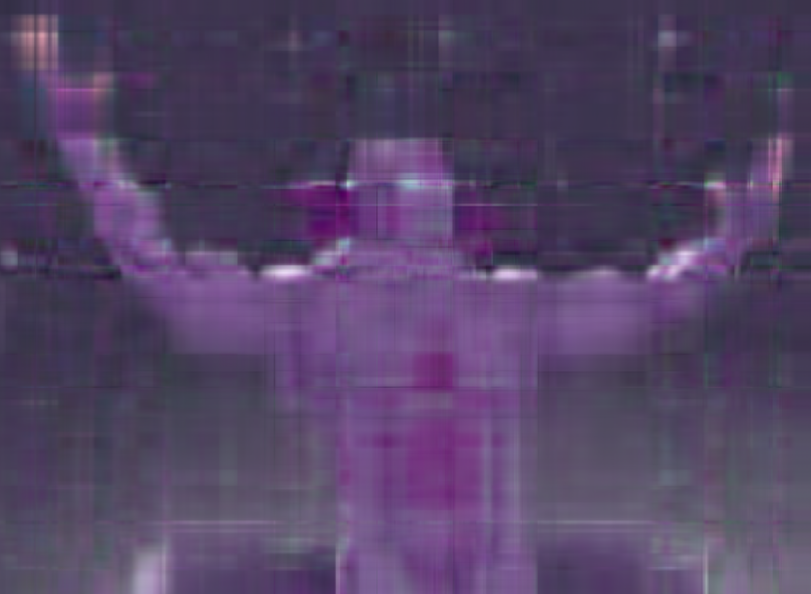

In [10]:
new_matrix(r,g,b)

In [11]:
import time
import saver
startTime = time.time()

name = "middle_repr_std.lol"
saver.create(name,width,height,N)
rn = svd_compression(red_m,N)
gn = svd_compression(green_m,N)
bn = svd_compression(blue_m,N)
saver.write_matrices(name,rn,gn,bn)

endTime = time.time()
elapsedTime = endTime - startTime

print(f'file size:{saver.file_size(name)}')
print(f'time: {elapsedTime}')

file size:331 Kbs
time: 0.5380642414093018


`randomized SVD`

In [12]:
def rSVD(X,r,q,p):
    ny = X.shape[1]
    P = np.random.randn(ny,r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ ( X.T @ Z)
    
    Q,R = np.linalg.qr(Z,mode='reduced')
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y,full_matrices=0)
    U = Q @ UY
    
    return U, S, VT

In [16]:
N = 10

def mult(A,B,C):
    return A[:,:(401)] @ np.diag(B[:(401)]) @ C[:(401),:]

r = mult(*list(rSVD(np.array(red_m), N,1,5)))
g = mult(*list(rSVD(np.array(green_m), N,1,5)))
b = mult(*list(rSVD(np.array(blue_m), N,1,5)))

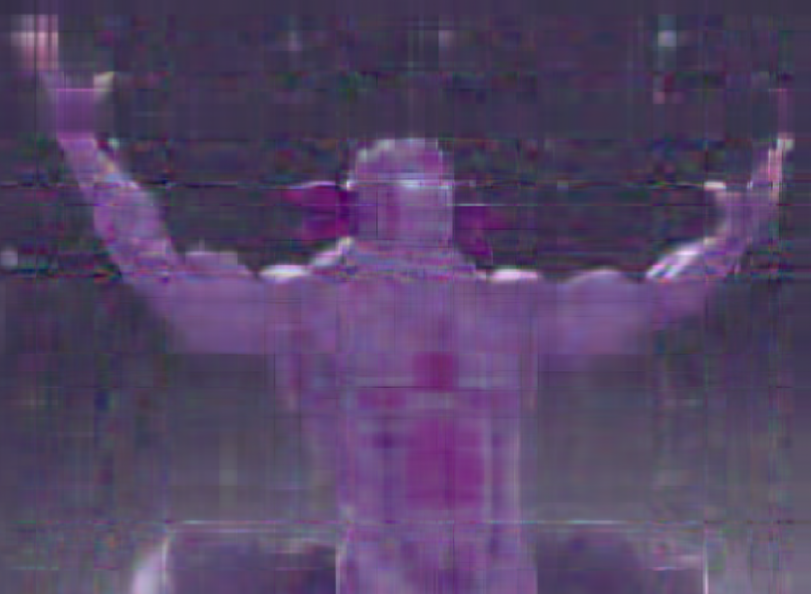

In [14]:
new_matrix(np.array(r),np.array(g),np.array(b))

In [15]:
startTime = time.time()

name = "primitiveOptimized.lol"
saver.create(name,width,height,N)
rn = rSVD(np.array(red_m),N,1,5)
gn = rSVD(np.array(green_m),N,1,5)
bn = rSVD(np.array(blue_m),N,1,5)
saver.write_matrices(name,rn,gn,bn)

endTime = time.time()
elapsedTime = endTime - startTime

print(f'file size:{saver.file_size(name)}')
print(f'time: {elapsedTime}')

file size:494 Kbs
time: 0.1949176788330078
